# **AP155 Lab Assignment**
## Module 2: Solution of Linear and Nonlinear Equations

_Instructions_: Answer each problem as completely as you can. Discuss **all** your answers as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points**.



### Student Information

_Full Name (Last Name, First Name)_: Hernandez, Red Christian \
_Student No._: 2022-03646\
_Section_: THV-TX-2

### Submission Information

_Date and Time Submitted (most recent upload)_: **3:35 PM - 06/10/2024**

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Red Christian F. Hernandez**

### Grading Information (c/o Lab Instructor)

TOTAL SCORE: **XX**/100

Score breakdown:
* Problem 1 - XX/30
* Problem 2 - XX/30
* Problem 3 - XX/40



### PROBLEM 1

**Solve for eigenvalues and eigenvectors of a symmetric matrix**

1. Use numpy's $\tt linalg$ package to find the eigenvalues and eigenvectors of the ff. symmetrix matrix *(15 pts.)*:

$ \begin{equation}
{\bf A} =
\begin{pmatrix}
8 & -2 & -20 \\
-2 & -3 & -9 \\
-20 & -9 & -3
\end{pmatrix} \end{equation} $

2. Check your answer numerically; that is, check that $\bf AV = VD$, where the $N$ x $N$ matrix $\bf V$ has the eigenvectors as its columns and $\bf D$ is the diagonal matrix with the eigenvalues $\lambda_i$ as its diagonal entries. *(15 pts.)*

In [ ]:
## PROBLEM 1

import numpy as np # we first import numpy as np to have access to its library
import numpy.linalg as LA # we import numpy.linalg as LA to have access to different linear algebra operations

# we define the given array as:
A = np.array([[8,-2,-20],
           [-2,-3,-9],
           [-20,-9,-3]])
# we utilize the eigh() function in order to compute for the eigenvalues of matrix A
# with x containing the eigenvalues of matrix A
# and with V containing the corresponding eigenvectors
x,V = LA.eigh(A)

# we print out eigenvalues and eigenvectors with its corresponding labels
print("the eigenvalues are:")
print(f'{x}\n')
print("the eigenvectors are:")
print(f'{V}\n')

# we make a diagonal matrix from the eigenvalues we computed earlier and then print it for reference
print("the eigenvalues in a diagonal matrix are:")
D = np.diag(x)
print(f'{D}\n')

# we define AV as the matrix multiplication of matrix A and matrix V, we utilize the dot() function from the numpy library
# and print the results as needed
AV = np.dot(A,V)
print("the matrix multiplication of the given matrix and the eigenvector matrix is:")
print(f'{AV}\n')

# we define VD as the matrix multiplication of matrix V and matrix D, we also utilize the dot() function from the numpy library
# and print the results as needed
VD = np.dot(V,D)
print("the matrix multiplication of the eigenvectors and the eigenvalues in a diagonal matrix is: ")
print(f'{VD}\n')

# since we are utilizing numerical methods, there will always be approximation errors in making computations due to the limitaions of a computer
# thus we have to compute for the percent error of the norms of the computed matrix in order to prove that the given dicrepancy is small enough
# to be counted as true
pct_error1 = LA.norm(np.dot(A,V) - np.dot(V,D))/LA.norm(np.dot(A,V))
print(pct_error1)
pct_error2 = LA.norm(np.dot(V,D)-np.dot(A,V))/LA.norm(np.dot(V,D))
print(pct_error2)

the eigenvalues are:
[-21.99606195   0.16021522  23.83584674]

the eigenvectors are:
[[ 0.52496527  0.36793396 -0.76748685]
 [ 0.40892672 -0.89987151 -0.15169114]
 [ 0.74645187  0.2342133   0.62285932]]

the eigenvalues in a diagonal matrix are:
[[-21.99606195   0.           0.        ]
 [  0.           0.16021522   0.        ]
 [  0.           0.          23.83584674]]

the matrix multiplication of the given matrix and the eigenvector matrix is:
[[-11.54716868   0.05894862 -18.29369893]
 [ -8.99477756  -0.14417311  -3.61568676]
 [-16.4190016    0.03752454  14.8463793 ]]

the matrix multiplication of the eigenvectors and the eigenvalues in a diagonal matrix is: 
[[-11.54716868   0.05894862 -18.29369893]
 [ -8.99477756  -0.14417311  -3.61568676]
 [-16.4190016    0.03752454  14.8463793 ]]

3.1023925402670955e-16
3.1023925402670955e-16


### PROBLEM 2

**Solve a nonlinear equation using the relaxation method**

Consider the equation $x=1- e^{-cx}$, where $c$ is a known parameter and $x$ is unknown. This equation arises in a variety of situations, including the physics of contact processes, mathematical models of epidemics, and the theory of random graphs.

1. Write a program to solve this equation for $x$ using the relaxation method for the case $c = 2$. Calculate your solution to an accuracy of at least $10^{-6}$. *(10 pts.)*

2. Modify your program to calculate the solution for values of $c$ from 0 to 3 in steps of 0.01. *(10 pts.)*

3. Make a plot of $x$ as a function of $c$. Describe the different regimes that you see. *(10 pts.)*

the x value for the given equation for the case c = 2 is x = 0.7984747083247583


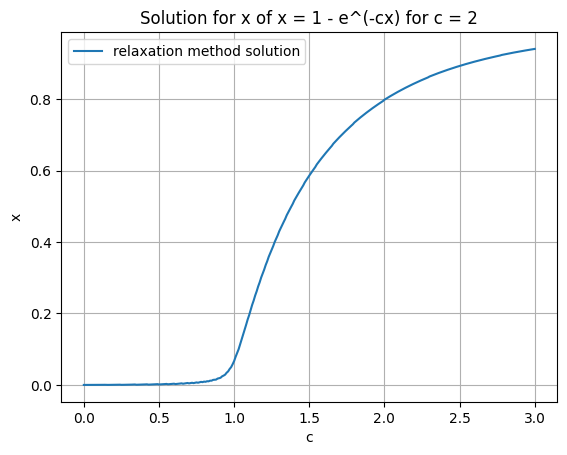

In [ ]:
## PROBLEM 2

import math # we import math library to have access to different mathematical functions
import numpy as np # we import numpy to have access to its useful library
import matplotlib.pyplot as plt # we import matplotlib.pylot in order to have the ability to plot our findings

# we define the given function in the problem as a function of (x and c)
def f(x, c):
  return 1-math.exp(-c*x)

# we define the error tolerance for the covergence given in the problem as E
E = 1*math.exp(-6)

# we define the relaxation method as the following:
def relx(x,c,E): # the relaxation method takes in 3 values for its function, x and c are quantities in the given function
                 # whilst E is the parameter for the error tolerance
  x0 = x # we set an intial guess for the value
  x1 = f(x, c) # it sets out to apply the initial value of x to the given function
  while (abs(x1 - x0)) > E: # the loop continues to run until the difference between the absolute value of the current and previous estimates
                            # of the solution is smaller than the error tolerance
    x0, x1 = x1, f(x1, c) # we update the previous estimate of x0 with x1 and x1 with the estimated value plugged in the function
                          # this iterative process gives a solution that converges closer and closer to the actual solution
  return x1 # once we satisfy the error tolerance requirement, we finally retrive the value

# the function for the relaxation method is called with intial value for x set to 1, c set to 2 as wanted
# in the problem and error tolerance as E.
# the results is then printed out a floating string together with a label
print(f'the x value for the given equation for the case c = 2 is x = {relx(1, 2, E)}')


c = np.linspace(0, 3, 300+1) # c generates an array with 301 evenly spaces values from 0 to 3
s = np.array([relx(1, i, E) for i in c]) # we compute the solution to x with different corresponding values of c in the given range
                                         # applying the relx() function to each value of c and storing it all in an array

plt.plot(c, s, label='relaxation method solution') # we create a plot with parameters c -> x-axis and x -> y-axis
plt.xlabel("c") # we label the x axis as c
plt.ylabel("x") # we label the y axis as x
plt.title("Solution for x of x = 1 - e^(-cx) for c = 2") # we label the title of the graph as the following
plt.grid() # we show a grid for given graph for better visibility of results
plt.legend() # we show a simple legend for the single output
plt.show() # we show the graph

# the equation shows a nonlinear relationship between x and c and shows that e^-cx decays exponentially
# thus causing the solution to asymptotically approach 1 as c continues to increase in the given equation

### PROBLEM 3

**Physics Application: Calculating the Lagrange point**

_Refer to Exercise 6.16 of the Newman text._ The $L_1$ Lagrange point is the point between the Earth and the Moon at which a satellite will orbit the Earth in perfect synchrony with the Moon, staying always in between the two.

Assuming circular orbits, and assuming that the Earth is much more massive than either the Moon or the satellite, the distance $r$ from the center of the Earth to the $L_1$ point satisfies
$$ \begin{equation}
\frac{GM}{r^2} - \frac{Gm}{(R-r)^2} = \omega^2 r,
\end{equation} $$
where $R$ is the distance from the Earth to the Moon, $M$ and $m$ are the Earth and Moon masses, $G$ is Newton's gravitational constant, and $\omega$ is the angular velocity of both the Moon and the satellite.

Use Newton's method to solve for the distance r from the Earth to the $L_1$ point. Compute a solution accurate to at least four significant figures.

In [ ]:
# PROBLEM 3

# we first define given constants in the problem
G = 6.674e-11
M = 5.974e24
m = 7.348e22
R = 3.844e8
w = 2.662e-6

# we define a error tolerance for the problem accurate to at least 4 significant figures
E = 10e-4

# we first define the f(x) = 0 in the given equation above as required by the newton rhapson method by
# putting all of the elements of the equation into one side of the equation
def f(r):
  return G*M/r**2 - G*m/(R-r)**2 - w**2*r # thus the equation is defined as follows

# we then define the derivative of the previous functions as follows
def df(r):
  return -2*G*M/r**3 - 2*G*m/(R-r)**3 - w**2

# we then define the newton rhapson method as follows:
def newtons_method(r, E): # we define a function named newtons_method() that takes in value r (the intial approximation) and E (the error tolerance)
  r0 = r # we initialize an initial guess for the value
  r1 = r-f(r)/df(r) # we then get that approximation of the new value using newtons method by the given formula

 # the loop will continue to iterate with r1 getting the values of the newly estimated value using the newton rhapson formula while r0 holds the previous value of r1
 # until the difference of the absolute value r1 and r0 is smaller than the error tolerance
  while (abs(r1 - r0) > E):
    r1, r0 = r1 - f(r1)/df(r1), r1
  return r1 # once we satisfy the requirement we finally retrive the value of r1

# we then utilize our newly defined function newtons_method() to solve the given problem with an initial guess of 10000 and an error tolerance of E
print(newtons_method(10000, E))

# result approximately shows a value of 3.26 x 10^8 m which is relatively closer to earth than to the moon thus
# showing that the area where the balancing point between the gravitational attraction of the moon and earth cancelling and centrifugal force

# we could show a fair guess that the answer is right considering that the gravitational force of the earth is much stronger than the moon
# so it would make much more sense of the langrange point to be much farther from the earth and closer to the moon to make up for the lack of magnitude in gravitational force


326045071.66535544
